In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
model = "mistralai/Mistral-7B-v0.1"
projection_method1 = "svd"
projection_method2 = "monarch"
projection_method3 = "robe"

with open(f"{model}+{projection_method1}.pickle", 'rb') as f:
        errors_by_layer_svd = pickle.load(f)
with open(f"{model}+{projection_method2}.pickle", 'rb') as f:
        errors_by_layer_monarch = pickle.load(f)
with open(f"{model}+{projection_method3}.pickle", 'rb') as f:
        errors_by_layer_robe = pickle.load(f)

In [3]:
def displayErrors(layer_errors, title, xlabel, ylabel, sublayer,  figsize=(20,6)):
    """
    Creates a bar graph for layer errors.

    Args:
        layer_errors (dict): A dictionary with layer names as keys and layer errors as values.
        title (str): The title of the graph.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        figsize (tuple, optional): The size of the figure (width, height) in inches. Defaults to (8, 6).

    Returns:
        None
    """
    sorted_layers = [word for word in list(layer_errors.keys()) if sublayer in word]

    # Create a bar plot
    fig, ax = plt.subplots(figsize=figsize)
    x = range(len(sorted_layers))
    layer_errors_values = [layer_errors[layer] for layer in sorted_layers]
    bar_width = 0.5
    ax.bar(x, layer_errors_values, bar_width, align='center')

    # Add labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_layers, rotation=45, ha='right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Adjust spacing and show the plot
    plt.tight_layout()
    plt.show()

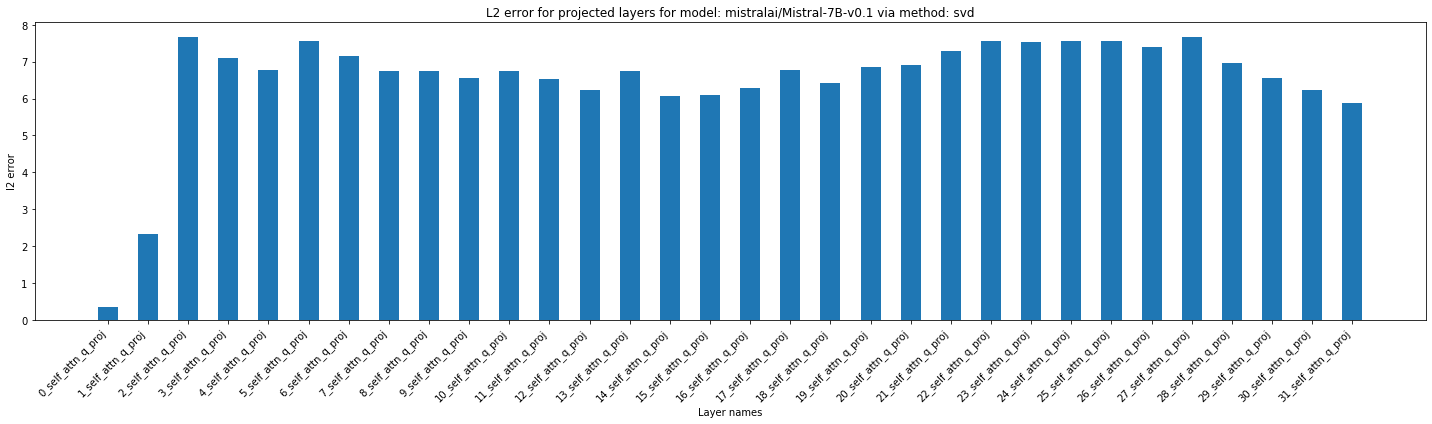

In [4]:
displayErrors(errors_by_layer_svd, f"L2 error for projected layers for model: {model} via method: {projection_method1}",
              "Layer names", "l2 error", "_self_attn_q_proj")

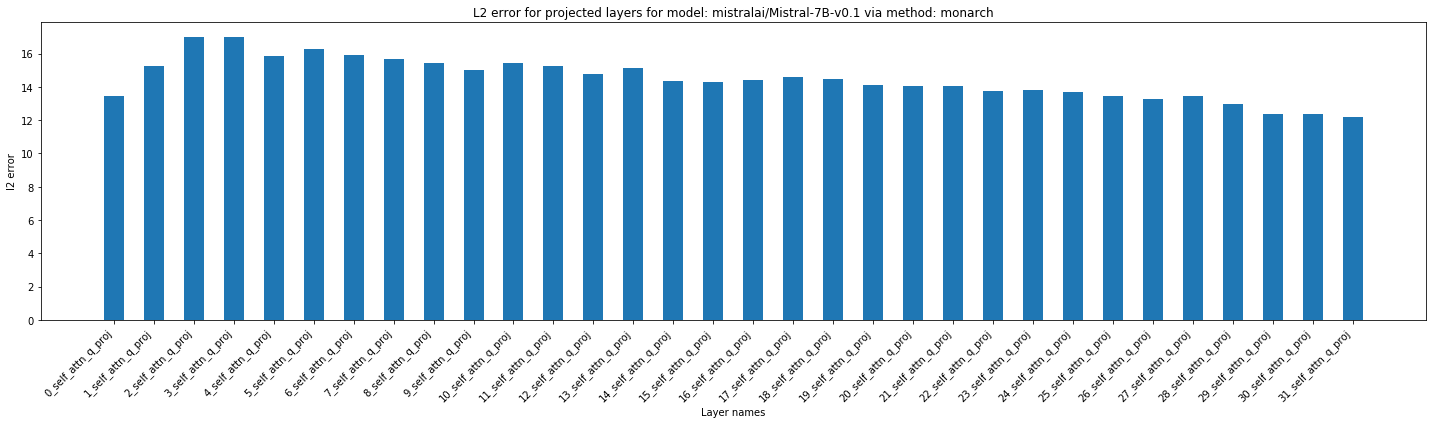

In [5]:
displayErrors(errors_by_layer_monarch, f"L2 error for projected layers for model: {model} via method: {projection_method2}", 
              "Layer names", "l2 error", "_self_attn_q_proj")

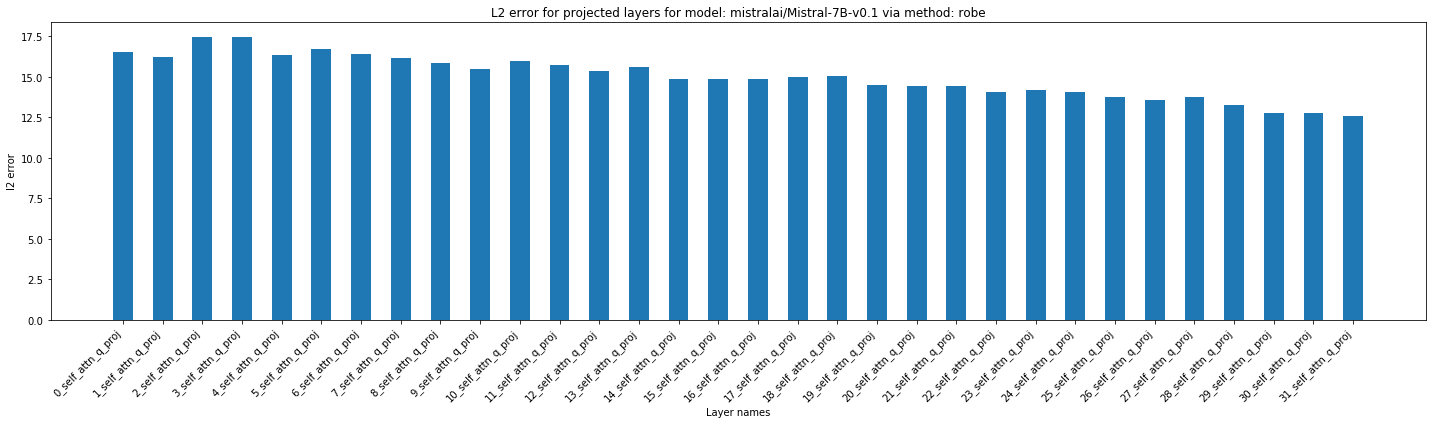

In [6]:
displayErrors(errors_by_layer_robe, f"L2 error for projected layers for model: {model} via method: {projection_method3}", 
              "Layer names", "l2 error", "_self_attn_q_proj")

In [7]:
def displayErrorsMultiple(layer_errors, title, xlabel, ylabel, methods, sublayer,figsize=(15,6)):
    """
    Creates a bar graph for layer errors.

    Args:
        layer_errors (dict): A dictionary with layer names as keys and layer errors as values.
        title (str): The title of the graph.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        figsize (tuple, optional): The size of the figure (width, height) in inches. Defaults to (8, 6).

    Returns:
        None
    """
    # Sort the layers by their names
    sorted_layers = []
    for errors in layer_errors:
        sorted_layers.append([word for word in list(errors.keys()) if sublayer in word])

    # Create a bar plot
    fig, ax = plt.subplots(figsize=figsize)
    x = range(len(sorted_layers[0]))

    # Define color list
    colors = ['#4285F4', '#EA4335', '#FBBC05']

    for index in range(len(layer_errors)):
        layer_errors_values = [layer_errors[index][layer] for layer in sorted_layers[index]]
        bar_width = 0.5
        ax.bar(x, layer_errors_values, bar_width, align='center', color = colors[index], label=methods[index])

    # Add labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(sorted_layers[0], rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

    # Adjust spacing and show the plot
    plt.tight_layout()
    plt.show()

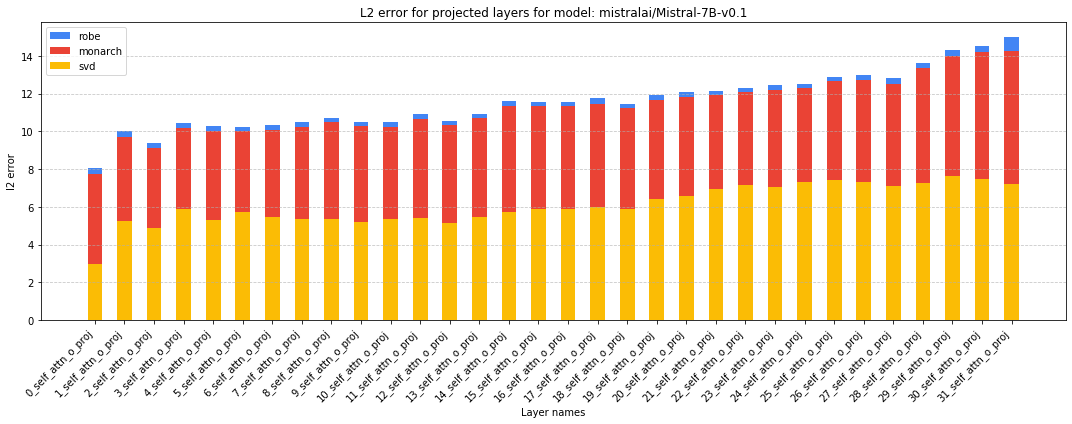

In [8]:
displayErrorsMultiple([errors_by_layer_robe, errors_by_layer_monarch, errors_by_layer_svd], f"L2 error for projected layers for model: {model}", 
              "Layer names", "l2 error", [projection_method3, projection_method2, projection_method1], "_self_attn_o_proj")